# Read data from R and process 

In [28]:
df <- read.csv("E:/Cybersecurity-Intrusion-detection--main/Cybersecurity-Intrusion-detection--main/ML Class Project/windows10_dataset.csv")
df <- na.omit(df)

NameError: name 'read' is not defined

In [29]:
df = Filter(function(x)(length(unique(x))>1), df)

NameError: name 'Filter' is not defined

In [13]:
dim(df)

[1] 35214   108

In [5]:
write.csv(df,'C:/Users/stati/OneDrive/Desktop/Research/windows10_dataset_processed.csv')

We removed the missing entries and remove the variables which have only a single value for all the etries or variability was zero.

# Required Libraries

We are going to use Windows 10 system generated values to predict whether the system is under cyber attack or not !

In [2]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Loading the data and EDA


In [3]:
# Set the working directory
import os
os.chdir("E:/Cybersecurity-Intrusion-detection--main/Cybersecurity-Intrusion-detection--main/ML Class Project")

In [30]:
import pandas as pd
df = pd.read_csv('windows10_dataset_processed.csv',encoding='latin-1')

In [31]:
#df

In [32]:
df = df.drop(df.columns[0],axis=1)

In [33]:
df = df.drop(df.columns[0],axis=1)

In [34]:
# Attack counts by type:
pd.crosstab(index=df['label'], columns=df['type'])

type,ddos,dos,injection,mitm,normal,password,scanning,xss
label,,,,,,,,
0,0,0,0,0,24283,0,0,0
1,4539,505,606,13,0,3594,434,1240


In [35]:
# Remove the label column:
df = df.drop(['type'],axis=1)

In [36]:
df.head(20)

,Processor_DPC_Rate,Processor_pct_.Idle_Time,Processor_pct_.Interrupt_Time,Processor_pct_.User_Time,Processor_pct_.C1_Time,Processor_pct_.Processor_Time,Processor_C1_ransitions_sec,Processor_pct_.DPC_Time,Processor_pct_.Privileged_Time,Processor_DPCs_Queued_sec,...,LogicalDisk._Total..Avg..Disk.Bytes.Read,LogicalDisk._Total..Avg..Disk.Write.Queue.Length,LogicalDisk._Total..Avg..Disk.Queue.Length,LogicalDisk._Total..pct_.Disk.Read.Time,LogicalDisk._Total..Disk.Write.Bytes.sec,LogicalDisk._Total..Disk.Transfers.sec,LogicalDisk._Total..Avg..Disk.Bytes.Transfer,LogicalDisk._Total..pct_.Disk.Write.Time,LogicalDisk._Total..Avg..Disk.sec.Transfer,label
0,4,29.908172,0.078240,61.027509,29.908172,66.200149,480.094991,0.078240,5.163866,568.322711,...,20546.650890,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0
1,9,31.751682,0.312521,59.144594,31.751682,66.247735,427.041284,0.078130,7.109852,512.249521,...,25742.311390,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0
2,5,29.495167,1.168222,46.027940,29.495167,66.900381,1159.426821,0.233644,20.872230,917.339935,...,35969.105350,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0
3,12,18.224375,1.097192,47.806219,18.224375,79.545208,736.622011,0.313483,31.740194,894.340589,...,40019.447780,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0
4,12,14.861187,1.562431,41.873151,14.861187,82.735137,896.108598,0.703094,40.857571,1381.842235,...,32025.590150,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0
5,19,22.657346,0.781280,39.454652,22.657346,74.061496,807.794015,0.234384,34.610715,955.502633,...,36368.133170,0.151794,0.804626,65.283183,1.283909e+07,788.780033,47320.635370,15.179443,0.001021,0
6,9,19.296817,2.734334,35.077595,19.296817,75.781616,1665.275721,0.624991,40.702510,1290.768735,...,16248.933500,0.072069,1.082287,101.021753,2.044406e+07,1103.615271,32610.079580,7.206940,0.000981,0
7,3,28.374642,0.312496,52.186774,28.374642,69.453550,402.292858,0.078124,17.265385,475.491558,...,43995.891500,0.048437,0.142110,9.367386,1.269656e+07,304.294597,57715.170560,4.843659,0.000467,0
8,3,23.961375,0.624038,39.626426,23.961375,72.854338,2141.205491,0.234014,33.230035,639.116640,...,46653.692920,0.098541,0.251544,15.300358,1.462362e+07,439.024507,65097.941320,9.854080,0.000573,0
9,3,61.473132,0.704204,21.047862,61.473132,36.308699,2936.251094,0.234735,15.257744,2955.981003,...,5065.711085,0.004243,0.740462,73.621908,3.435608e+03,2808.056763,5065.308510,0.424339,0.000264,0


# Making the data balance

In [37]:
#df = df_new

In [38]:
freq = df['label'].value_counts()
freq

0    24283
1    10931
Name: label, dtype: int64

In [39]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

#plt.pie(mydata,labels = mylabels, autopct=autopct_format(mydata))

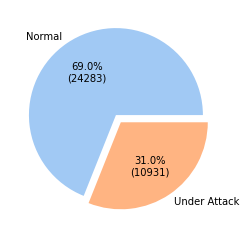

In [40]:
import matplotlib.pyplot as plt
import seaborn
  
# declaring data
data = [24283, 10931]
keys = ['Normal', 'Under Attack']
  
# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = seaborn.color_palette('pastel')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct=autopct_format(data))
  
# displaying chart
plt.show()

In [41]:
freq = df['label'].value_counts()
delete_frac = round((freq[0] - freq[1])/freq[0],2)
df = df.drop(df.query('label == 0').sample(frac= delete_frac).index)
df['label'].value_counts()

1    10931
0    10927
Name: label, dtype: int64

In [42]:
df.shape

(21858, 106)

# Investigating the correlation

In [43]:
X = df.iloc[:,0:105]

In [44]:
cormat = X.corr()
round(cormat,2)

,Processor_DPC_Rate,Processor_pct_.Idle_Time,Processor_pct_.Interrupt_Time,Processor_pct_.User_Time,Processor_pct_.C1_Time,Processor_pct_.Processor_Time,Processor_C1_ransitions_sec,Processor_pct_.DPC_Time,Processor_pct_.Privileged_Time,Processor_DPCs_Queued_sec,...,LogicalDisk._Total..pct_.Disk.Time,LogicalDisk._Total..Avg..Disk.Bytes.Read,LogicalDisk._Total..Avg..Disk.Write.Queue.Length,LogicalDisk._Total..Avg..Disk.Queue.Length,LogicalDisk._Total..pct_.Disk.Read.Time,LogicalDisk._Total..Disk.Write.Bytes.sec,LogicalDisk._Total..Disk.Transfers.sec,LogicalDisk._Total..Avg..Disk.Bytes.Transfer,LogicalDisk._Total..pct_.Disk.Write.Time,LogicalDisk._Total..Avg..Disk.sec.Transfer
Processor_DPC_Rate,1.00,-0.25,0.06,0.04,-0.25,0.20,0.69,0.45,0.33,0.78,...,0.52,0.02,0.12,0.69,0.64,0.52,0.75,-0.01,0.05,0.00
Processor_pct_.Idle_Time,-0.25,1.00,-0.43,-0.85,1.00,-0.99,-0.20,-0.43,-0.77,-0.31,...,-0.22,-0.20,-0.11,-0.26,-0.25,-0.33,-0.31,-0.04,-0.05,-0.10
Processor_pct_.Interrupt_Time,0.06,-0.43,1.00,0.20,-0.43,0.42,0.08,0.48,0.54,0.10,...,0.10,0.07,0.10,0.05,0.08,0.16,0.04,0.09,0.08,0.08
Processor_pct_.User_Time,0.04,-0.85,0.20,1.00,-0.85,0.87,-0.07,0.17,0.33,0.04,...,0.03,0.21,0.03,0.03,0.04,0.10,0.06,0.05,0.00,0.08
Processor_pct_.C1_Time,-0.25,1.00,-0.43,-0.85,1.00,-0.99,-0.20,-0.43,-0.77,-0.31,...,-0.22,-0.20,-0.11,-0.26,-0.25,-0.33,-0.31,-0.04,-0.05,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LogicalDisk._Total..Disk.Write.Bytes.sec,0.52,-0.33,0.16,0.10,-0.33,0.27,0.70,0.32,0.38,0.65,...,0.62,0.21,0.34,0.66,0.63,1.00,0.67,0.14,0.26,0.07
LogicalDisk._Total..Disk.Transfers.sec,0.75,-0.31,0.04,0.06,-0.31,0.26,0.88,0.41,0.41,0.94,...,0.63,0.02,0.17,0.83,0.77,0.67,1.00,-0.04,0.07,-0.01
LogicalDisk._Total..Avg..Disk.Bytes.Transfer,-0.01,-0.04,0.09,0.05,-0.04,0.04,0.02,0.16,0.01,0.00,...,0.01,0.22,0.04,-0.01,-0.01,0.14,-0.04,1.00,0.04,0.11
LogicalDisk._Total..pct_.Disk.Write.Time,0.05,-0.05,0.08,0.00,-0.05,0.02,0.13,0.02,0.03,0.07,...,0.65,0.14,0.99,0.31,0.18,0.26,0.07,0.04,1.00,0.47


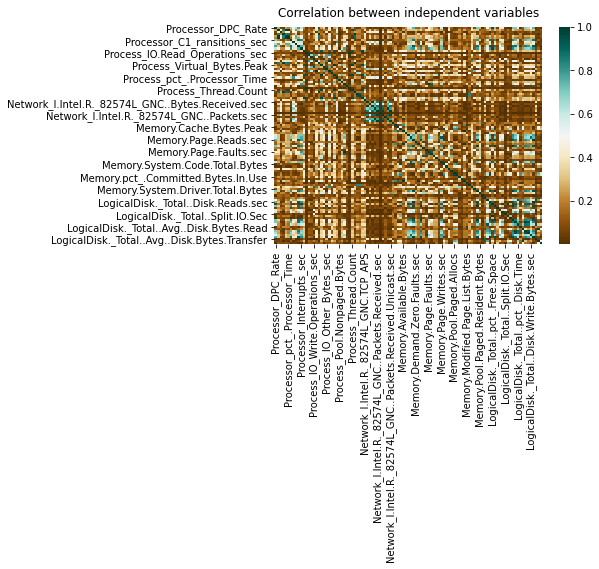

In [45]:
import seaborn as sns
mask = np.triu(np.ones_like(X.corr().abs(), dtype=np.bool))

heatmap = sns.heatmap(X.corr().abs(),annot=False,cmap='BrBG')
heatmap.set_title('Correlation between independent variables', fontdict={'fontsize':12}, pad=10);

In [46]:
# calculate the correlation matrix and reshape
df_corr = X.corr().abs().stack().reset_index()

# rename the columns
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
df_corr.head()

,FEATURE_1,FEATURE_2,CORRELATION
0,Processor_DPC_Rate,Processor_DPC_Rate,1.000000
1,Processor_DPC_Rate,Processor_pct_.Idle_Time,0.247979
2,Processor_DPC_Rate,Processor_pct_.Interrupt_Time,0.063113
3,Processor_DPC_Rate,Processor_pct_.User_Time,0.035421
4,Processor_DPC_Rate,Processor_pct_.C1_Time,0.247979


In [47]:
df_corr = df_corr[df_corr['FEATURE_1'] != df_corr['FEATURE_2']]

In [48]:
df_corr_perfect = df_corr[df_corr.CORRELATION == 1]

In [49]:
df_corr_perfect

,FEATURE_1,FEATURE_2,CORRELATION
109,Processor_pct_.Idle_Time,Processor_pct_.C1_Time,1.0
421,Processor_pct_.C1_Time,Processor_pct_.Idle_Time,1.0
1701,Process_Page_File.Bytes,Process_Private_Bytes,1.0
2221,Process_Private_Bytes,Process_Page_File.Bytes,1.0
4139,Network_I.Intel.R._82574L_GNC..Packets.Sent.Un...,Network_I.Intel.R._82574L_GNC..Packets.Sent.sec,1.0
4245,Network_I.Intel.R._82574L_GNC..Packets.Receive...,Network_I.Intel.R._82574L_GNC..Packets.Receive...,1.0
4659,Network_I.Intel.R._82574L_GNC..Packets.Sent.sec,Network_I.Intel.R._82574L_GNC..Packets.Sent.Un...,1.0
4765,Network_I.Intel.R._82574L_GNC..Packets.Receive...,Network_I.Intel.R._82574L_GNC..Packets.Receive...,1.0
5306,Memory.Available.Bytes,Memory.Available.KBytes,1.0
5930,Memory.Available.KBytes,Memory.Available.Bytes,1.0


In [50]:
df_corr_perfect = df_corr_perfect.drop([109, 1701,4139,4659,5306])

In [51]:
df_corr_perfect

,FEATURE_1,FEATURE_2,CORRELATION
421,Processor_pct_.C1_Time,Processor_pct_.Idle_Time,1.0
2221,Process_Private_Bytes,Process_Page_File.Bytes,1.0
4245,Network_I.Intel.R._82574L_GNC..Packets.Receive...,Network_I.Intel.R._82574L_GNC..Packets.Receive...,1.0
4765,Network_I.Intel.R._82574L_GNC..Packets.Receive...,Network_I.Intel.R._82574L_GNC..Packets.Receive...,1.0
5930,Memory.Available.KBytes,Memory.Available.Bytes,1.0


In [52]:
lst1 = df_corr_perfect.FEATURE_1
remove_var = list(set(lst1))

In [53]:
df = df.drop(remove_var, axis=1)

In [54]:
df.shape

(21858, 101)

## Seperating independent and dependent variables:

In [55]:
# Removing Y and Id
X = df.iloc [: ,:-1].values    # independent variables
# Keeping only Y
y = df.iloc [: , -1].values    # dependent variables

## Handling Inf values:


In [56]:
import numpy as np

# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(X[:, i][X[:, i] != -np.inf]) for i in range(X.shape[1])]
maxs = [np.nanmax(X[:, i][X[:, i] != np.inf]) for i in range(X.shape[1])]

# go through matrix one column at a time and replace  + and -infinity 
# with the max or min for that column
for i in range(X.shape[1]):
    X[:, i][X[:, i] == -np.inf] = mins[i]
    X[:, i][X[:, i] == np.inf] = maxs[i]

## Standardizing all numerical columns 

In [57]:
# feature Scaling
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [88]:
df.shape

(21858, 101)

# Train test Split

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

# Supervised Model selection

In [60]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [46]:


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [10,20,50],
            'kernel': ['rbf','poly','sigmoid','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50,100,200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [5,15,25],
            'criterion' : ['gini', 'entropy']
        }
    }
}

In [47]:
import time
start = time.time()

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)


print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Execution time: 00:42:09.34


In [48]:
df

,model,best_score,best_params
0,svm,0.968946,"{'C': 50, 'kernel': 'linear'}"
1,random_forest,0.986789,"{'criterion': 'entropy', 'max_depth': 25, 'max..."


In [49]:
df.best_params[1]

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [70]:
forest=RandomForestClassifier( n_estimators= 200, max_depth=25, criterion='entropy',max_features = 'sqrt')
forest.fit(X_train, y_train)
# Measure model performance
y_pred = forest.predict(X_test)
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Test Accuracy: 0.990


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2186
           1       0.98      1.00      0.99      2186

    accuracy                           0.99      4372
   macro avg       0.99      0.99      0.99      4372
weighted avg       0.99      0.99      0.99      4372



In [68]:
modelSVMlinear=svm.SVC(kernel='linear',C = 50, probability=True)
modelSVMlinear.fit(X_train, y_train)
# Measure model performance
y_pred = modelSVMlinear.predict(X_test)
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Test Accuracy: 0.974


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2186
           1       0.96      0.99      0.97      2186

    accuracy                           0.97      4372
   macro avg       0.97      0.97      0.97      4372
weighted avg       0.97      0.97      0.97      4372



Between the two supervised model random forest is the clear winner and the test accuracy is 98.9%.

In [63]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [64]:
# Random forest
forest.fit(X_train, y_train)
y_pred_prob_rf = forest.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)

In [66]:
# SVM 
modelSVMlinear=svm.SVC(kernel='linear',C = 50, probability=True)
modelSVMlinear.fit(X_train, y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

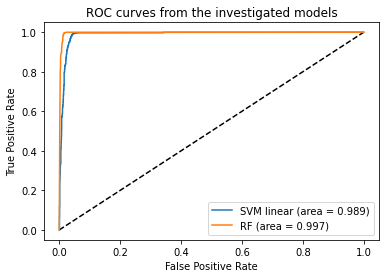

In [67]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

# Unsupervised modelling:

## SOM

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

In [73]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [86]:
som_shape = (1, 2)
som = MiniSom(som_shape[0], som_shape[1], X_train.shape[1],sigma = 4, learning_rate=0.5, 
              neighborhood_function='triangle')
som.pca_weights_init(X_train)
som.train_random(X_train, 100, verbose=False)

print(classification_report(y_test, classify(som, X_test)))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80      2186
           1       0.75      0.98      0.85      2186

    accuracy                           0.83      4372
   macro avg       0.86      0.83      0.82      4372
weighted avg       0.86      0.83      0.82      4372



## K-means clustering 

In [61]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics 


import warnings
warnings.filterwarnings('ignore')

In [62]:
def k_means_fit(covariates,centroid_method):
    data = pd.DataFrame(covariates)
    # from sklearn.cluster import KMeans 
    clusters = 2
    number_of_iteration = 100
    kmeans = KMeans(n_clusters = clusters,n_init= number_of_iteration,init = centroid_method,algorithm = "full") 
    kmeans.fit(data) 
    
    y_labels_test = kmeans.predict(X_test)
    tab = pd.crosstab(index=y_test, columns=y_labels_test)
    print (metrics.classification_report(y_test,y_labels_test))

In [64]:
k_means_fit(X_train,centroid_method = "random")

              precision    recall  f1-score   support

           0       1.00      0.68      0.81      2186
           1       0.76      1.00      0.86      2186

    accuracy                           0.84      4372
   macro avg       0.88      0.84      0.84      4372
weighted avg       0.88      0.84      0.84      4372



# Hierchical clustering 

In [66]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_test)
print (metrics.classification_report(y_test,cluster.labels_))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      2186
           1       0.74      0.88      0.80      2186

    accuracy                           0.79      4372
   macro avg       0.80      0.79      0.78      4372
weighted avg       0.80      0.79      0.78      4372



# Result

Among these three clustering methods K-means clustering giving us the best classification accuracy which is 84%.

In [89]:
y_train.shape

(17486,)

In [90]:
y_test.shape

(4372,)